In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data_df = pd.read_csv('./Data.csv')
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [159]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [160]:
# showing percents of missing datas in each column
for col in data_df.columns:
    # print(col)
    missing_datas = data_df[col].isna().sum()
    missing_percent = missing_datas / len(data_df) * 100
    print(f"column {col} missing {missing_percent} %")


column Country missing 0.0 %
column Age missing 10.0 %
column Salary missing 10.0 %
column Purchased missing 0.0 %


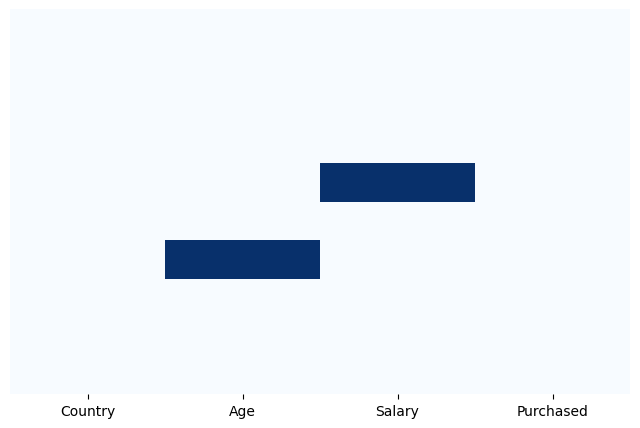

In [161]:
plt.subplots(figsize=(8, 5))
sns.heatmap(data_df.isna(), cmap='Blues', cbar=False, yticklabels=False);

In [162]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [163]:
# get training datas
X = data_df.iloc[:,:-1]

In [164]:
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [165]:
X = X.values # convert to numpy array, since it's used for machine learning model

In [166]:
# get labels
Y = data_df.iloc[:,[-1]]
Y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [167]:
Y = Y.values # convert to numpy

In [168]:
Y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

In [169]:
from sklearn.impute import SimpleImputer

In [170]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:, 1:3]) # calculate values based on strategy
X[:, 1:3] = imputer.transform(X[:, 1:3]) # replace, transform values after calculate
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [171]:
# Encode categorial data

# because machine learning model cannot use string --> encode to numbers

In [172]:
X # or called INDEPENDENT VARIABLE x, DEPENDENT VARIABLE y (y depends on x)

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [173]:
# so that we're gonna encode those String values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[ # list of tuples
        ('encoder', OneHotEncoder(), [0]) 
        # (name, transformer, columns),
        # (),
        # ()
    ], 
    remainder='passthrough' # remaining columns, we want to keep the remaining columns
)

X = ct.fit_transform(X)

In [174]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [175]:
# encode the Y -- dependent variable
Y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
le = LabelEncoder()
Y = le.fit_transform(Y)

c:\Home\development\me-selflearn-machinelearning\machinelearningenv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [179]:
# Splitting the dataset into the Training Set and Test test

In [180]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [181]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [182]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [183]:
# look at X
# we see 35, or 58,0000 .... we don't put thest numbers into our machine learning model
# --> feature scaling

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

In [186]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [187]:
# X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])
# NO! we only need transform
# because we already apply fit() to the X_train 
# --> it already calculated something earlier (maybe the range to scale down) based on the data of the X_train
# --> if you fit() with the X_test, it'll recalculate (the new range)
# that's why you'll see 1.0 and -1.0 because there's only 2 rows 
# and it takes that 2 rows as the new range -1, 1 
# ready to scale down other smaller value
# but there's are only 2 rows I guess :((

X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [188]:
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)